<a href="https://colab.research.google.com/github/ritumunshi/cadenza_challenge/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install musdb
!pip install youtube-dl
!pip install openunmix

In [2]:
import torch
import torchaudio
import numpy as np
import scipy
import youtube_dl
import stempeg
import os
from google.colab import files
from IPython.display import Audio, display

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [121]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
!pip install wavio


In [9]:
output_dir = "/content/gdrive/My Drive/AudioFolder" # Replace with your desired folder
#output_path = os.path.join(output_dir, f"{target}.wav")


In [19]:
import soundfile as sf
from openunmix import predict
import wavio
import numpy as np
from scipy.io.wavfile import write

target_path = str("/content/sample_data/signal3.wav")
# Load the audio file
track_audio, track_rate = sf.read(target_path)

estimates = predict.separate(
    torch.as_tensor(track_audio).float(),
    rate=track_rate,
    targets=['vocals', 'drums', 'bass', 'other'],
    residual=True,
    device=device,
)
for target, estimate in estimates.items():
    print(target)
    display(Audio(estimate.detach().cpu().numpy()[0], rate=track_rate))
    audio_data = estimate.detach().cpu().numpy()[0]

    """
     # Ensure data is 2D for mono file
    if len(audio_data.shape) == 1:
        audio_data = audio_data.reshape(-1, 1)

    # Ensure data is of type float32
    audio_data = audio_data.astype(np.float32)

    # Debug info
    print("Shape:", audio_data.shape)
    print("Data type:", audio_data.dtype)
    print("Sample rate:", track_rate)

    output_path = f"open_unmix_source_{target}.wav"
    wavio.write(output_path, audio_data, rate=track_rate, sampwidth=3)
    #sf.write(output_path, audio_data, track_rate)
    files.download(output_path)
    """
    output_path = os.path.join(output_dir, f"open_unmix_source_{target}.wav")

    # Normalize the audio data
    audio_data_normalized = (audio_data / np.max(np.abs(audio_data)) * 32767).astype(np.int16)

    # Write the file
    write(output_path, track_rate, audio_data_normalized.T) # Transpose if the data is stereo

    print(f"{target} written to {output_path}")




vocals


vocals written to /content/gdrive/My Drive/AudioFolder/open_unmix_source_vocals.wav
drums


drums written to /content/gdrive/My Drive/AudioFolder/open_unmix_source_drums.wav
bass


bass written to /content/gdrive/My Drive/AudioFolder/open_unmix_source_bass.wav
other


other written to /content/gdrive/My Drive/AudioFolder/open_unmix_source_other.wav
residual


residual written to /content/gdrive/My Drive/AudioFolder/open_unmix_source_residual.wav


In [ ]:
pip install demucs

In [ ]:
!pip install -U demucs

In [16]:
from demucs import pretrained

from scipy.io.wavfile import write
import numpy as np
import os


In [23]:
# Customize the following options!
model = "htdemucs"
extensions = ["mp3", "wav", "ogg", "flac"]  # we will look for all those file types.
two_stems = "vocals"   # only separate one stems from the rest, for instance
# two_stems = "vocals"

# Options for the output audio.
mp3 = True
mp3_rate = 320
wav = True
wav_rate = 320
float32 = False  # output as float 32 wavs, unsused if 'mp3' is True.
int24 = False    # output as int24 wavs, unused if 'mp3' is True.
# You cannot set both `float32 = True` and `int24 = True` !!

In [27]:
!python -m demucs.separate --help


Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/demucs/separate.py", line 17, in <module>
    from .audio import AudioFile, convert_audio, save_audio
  File "/usr/local/lib/python3.10/dist-packages/demucs/audio.py", line 10, in <module>
    import lameenc
ImportError: /usr/local/lib/python3.10/dist-packages/lameenc.cpython-310-x86_64-linux-gnu.so: undefined symbol: __pow_finite


In [27]:
!python3 -m pip install -U git+https://github.com/facebookresearch/demucs#egg=demucs

  Cloning https://github.com/facebookresearch/demucs to /tmp/pip-install-t9gchm9e/demucs_20c14bb044a249319c2ef46a49b46d6d
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/demucs /tmp/pip-install-t9gchm9e/demucs_20c14bb044a249319c2ef46a49b46d6d
  Resolved https://github.com/facebookresearch/demucs to commit 0cb4a90dbeb36b9495b505ad1ec90ac91feb7bc4
  Preparing metadata (setup.py) ... done
  Created wheel for demucs: filename=demucs-4.0.1a3-py3-none-any.whl size=78420 sha256=e31edba5696d43cd981c836931de79af30f78b5e2129652c1dba4256bd60ab72
  Stored in directory: /tmp/pip-ephem-wheel-cache-7l66x7of/wheels/45/e4/ca/7791f04b554e5433713e22900eaf11595e27c454fb65ac30ab
Successfully built demucs
  Attempting uninstall: demucs
    Found existing installation: demucs 4.0.0
    Uninstalling demucs-4.0.0:
      Successfully uninstalled demucs-4.0.0


In [31]:
# Customize the following options!
model = "htdemucs"
extensions = ["mp3", "wav", "ogg", "flac"]  # we will look for all those file types.
two_stems = None   # only separate one stems from the rest, for instance
# two_stems = "vocals"

# Options for the output audio.
mp3 = True
mp3_rate = 320
float32 = False  # output as float 32 wavs, unsused if 'mp3' is True.
int24 = False    # output as int24 wavs, unused if 'mp3' is True.
# You cannot set both `float32 = True` and `int24 = True` !!

in_path = "/content/sample_data/"
out_path = "/content/gdrive/My Drive/AudioFolder1" # Replace with your desired folder

In [32]:
separate()

Going to separate the files:
/content/sample_data/signal3.wav
/content/sample_data/preview.mp3
With command:  python3 -m demucs.separate -o /content/gdrive/My Drive/AudioFolder1 -n htdemucs --mp3 --mp3-bitrate=320


Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/demucs/separate.py", line 17, in <module>
    from .audio import AudioFile, convert_audio, save_audio
  File "/usr/local/lib/python3.10/dist-packages/demucs/audio.py", line 10, in <module>
    import lameenc
ImportError: /usr/local/lib/python3.10/dist-packages/lameenc.cpython-310-x86_64-linux-gnu.so: undefined symbol: __pow_finite


Command failed, something went wrong.


In [ ]:
!pip install asteroid


ERROR: Could not find a version that satisfies the requirement convtasnet (from versions: none)
ERROR: No matching distribution found for convtasnet


ERROR: Could not find a version that satisfies the requirement pretrained (from versions: none)
ERROR: No matching distribution found for pretrained


In [77]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

import matplotlib.pyplot as plt

2.0.1+cu118
2.0.2+cu118


In [78]:
pip install mir_eval


In [79]:
from IPython.display import Audio
from mir_eval import separation
from torchaudio.pipelines import HDEMUCS_HIGH_MUSDB_PLUS
from torchaudio.utils import download_asset

In [80]:
bundle = HDEMUCS_HIGH_MUSDB_PLUS

model = bundle.get_model()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)

sample_rate = bundle.sample_rate

print(f"Sample rate: {sample_rate}")

100%|██████████| 319M/319M [00:01<00:00, 253MB/s]


Sample rate: 44100


In [81]:
from torchaudio.transforms import Fade


def separate_sources(
    model,
    mix,
    segment=10.0,
    overlap=0.1,
    device=None,
):
    """
    Apply model to a given mixture. Use fade, and add segments together in order to add model segment by segment.

    Args:
        segment (int): segment length in seconds
        device (torch.device, str, or None): if provided, device on which to
            execute the computation, otherwise `mix.device` is assumed.
            When `device` is different from `mix.device`, only local computations will
            be on `device`, while the entire tracks will be stored on `mix.device`.
    """
    if device is None:
        device = mix.device
    else:
        device = torch.device(device)

    batch, channels, length = mix.shape

    chunk_len = int(sample_rate * segment * (1 + overlap))
    start = 0
    end = chunk_len
    overlap_frames = overlap * sample_rate
    fade = Fade(fade_in_len=0, fade_out_len=int(overlap_frames), fade_shape="linear")

    final = torch.zeros(batch, len(model.sources), channels, length, device=device)

    while start < length - overlap_frames:
        chunk = mix[:, :, start:end]
        with torch.no_grad():
            out = model.forward(chunk)
        out = fade(out)
        final[:, :, :, start:end] += out
        if start == 0:
            fade.fade_in_len = int(overlap_frames)
            start += int(chunk_len - overlap_frames)
        else:
            start += chunk_len
        end += chunk_len
        if end >= length:
            fade.fade_out_len = 0
    return final


def plot_spectrogram(stft, title="Spectrogram"):
    magnitude = stft.abs()
    spectrogram = 20 * torch.log10(magnitude + 1e-8).numpy()
    _, axis = plt.subplots(1, 1)
    axis.imshow(spectrogram, cmap="viridis", vmin=-60, vmax=0, origin="lower", aspect="auto")
    axis.set_title(title)
    plt.tight_layout()

In [93]:
# Load the audio file
waveform, sample_rate = torchaudio.load("/content/sample_data/signal3.wav")
waveform = waveform.to(device)
mixture = waveform

# If the waveform is mono and the model expects stereo, repeat the channel
if waveform.shape[0] == 1 and model.audio_channels == 2:
    waveform = waveform.repeat(2, 1)  # Repeat the mono channel to create a stereo signal

# Parameters
segment: int = 10
overlap = 0.1

print("Separating track")

ref = waveform.mean(0)
waveform = (waveform - ref.mean()) / ref.std()  # Normalization

sources = separate_sources(
    model,
    waveform[None],
    device=device,
    segment=segment,
    overlap=overlap,
)[0]
sources = sources * ref.std() + ref.mean()

sources_list = model.sources
sources = list(sources)

audios = dict(zip(sources_list, sources))


Separating track


In [102]:
N_FFT = 4096
N_HOP = 4
stft = torchaudio.transforms.Spectrogram(
    n_fft=N_FFT,
    hop_length=N_HOP,
    power=None,
)

In [107]:
import os
import torchaudio
from torch import device

# Load the audio file
waveform, sample_rate = torchaudio.load("/content/sample_data/signal3.wav")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
waveform = waveform.to(device)
mixture = waveform

# If the waveform is mono and the model expects stereo, repeat the channel
#model = Demucs() # You may need to adjust parameters here
if waveform.shape[0] == 1 and model.audio_channels == 2:
    waveform = waveform.repeat(2, 1)  # Repeat the mono channel to create a stereo signal

# Parameters
segment: int = 10
overlap = 0.1

print("Separating track")

ref = waveform.mean(0)
waveform = (waveform - ref.mean()) / ref.std()  # Normalization

sources = separate_sources(
    model,
    waveform[None],
    device=device,
    segment=segment,
    overlap=overlap,
)[0]
sources = sources * ref.std() + ref.mean()

sources_list = model.sources
sources = list(sources)

audios = dict(zip(sources_list, sources))

# Save the separated sources to output files
output_directory = "/content/gdrive/My Drive/AudioFolder1/"
os.makedirs(output_directory, exist_ok=True)  # Create directory if it doesn't exist

for source_name, source_waveform in audios.items():
    output_path = os.path.join(output_directory, f"{source_name}.wav")
    torchaudio.save(output_path, source_waveform.cpu(), sample_rate)
    print(f"Saved {source_name} to {output_path}")


Separating track
Saved drums to /content/gdrive/My Drive/AudioFolder1/drums.wav
Saved bass to /content/gdrive/My Drive/AudioFolder1/bass.wav
Saved other to /content/gdrive/My Drive/AudioFolder1/other.wav
Saved vocals to /content/gdrive/My Drive/AudioFolder1/vocals.wav


SDR for drums: 114.91811969463296
Saved drums to /content/gdrive/My Drive/AudioFolder1/drums.wav
SDR for bass: 107.30659635162007
Saved bass to /content/gdrive/My Drive/AudioFolder1/bass.wav
SDR for other: -7.001072261305314
Saved other to /content/gdrive/My Drive/AudioFolder1/other.wav
SDR for vocals: -7.030314897089267
Saved vocals to /content/gdrive/My Drive/AudioFolder1/vocals.wav


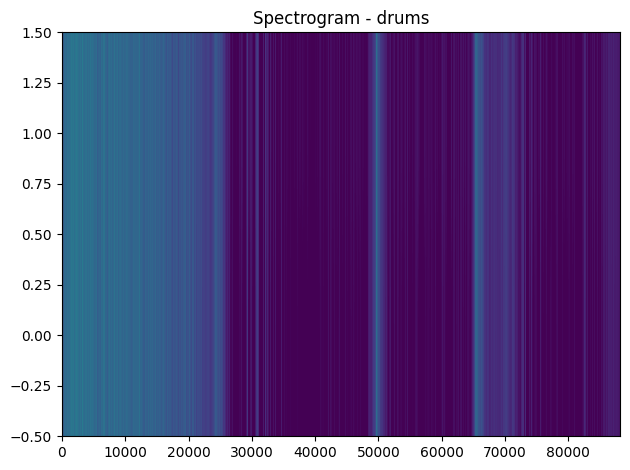

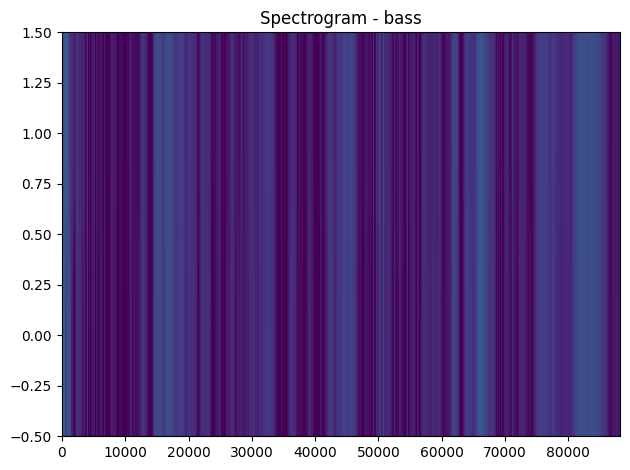

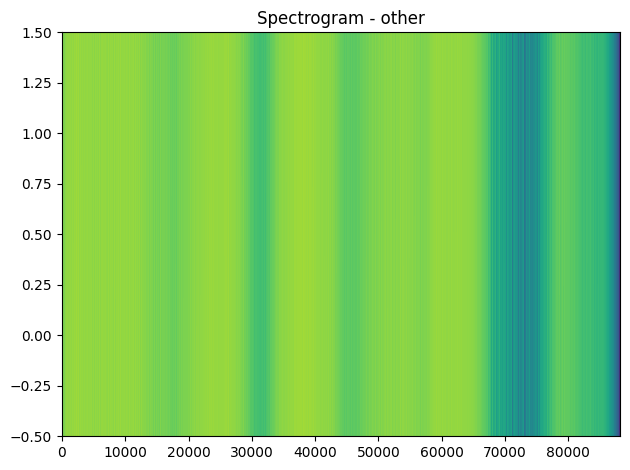

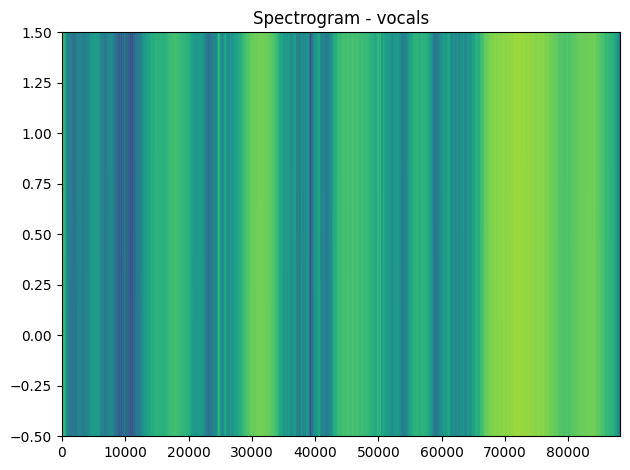

In [110]:
from mir_eval.separation import bss_eval_sources

# Assuming you have paths to the original source files
original_source_paths = [
    "/content/gdrive/My Drive/AudioFolder1/drums.wav",
    "/content/gdrive/My Drive/AudioFolder1/bass.wav",
    "/content/gdrive/My Drive/AudioFolder1/vocals.wav",
    "/content/gdrive/My Drive/AudioFolder1/other.wav",
]

# Load the original sources
original_sources = [torchaudio.load(path)[0] for path in original_source_paths]



for i, (source_name, source_waveform) in enumerate(audios.items()):
    source_waveform_np = source_waveform.cpu().numpy()
    original_source_np = original_sources[i].numpy()

    # Calculate SDR
    sdr, _, _, _ = bss_eval_sources(original_source_np, source_waveform_np)
    print(f"SDR for {source_name}: {sdr.mean()}")

    # Plot the spectrogram
    plot_spectrogram(torch.tensor(source_waveform_np), f"Spectrogram - {source_name}")

    # Save to file
    output_path = os.path.join(output_directory, f"{source_name}.wav")
    torchaudio.save(output_path, torch.tensor(source_waveform_np), sample_rate)
    print(f"Saved {source_name} to {output_path}")

In [ ]:
pip install nussl[all]

In [ ]:
pip install spleeter


In [116]:
from spleeter.separator import Separator

# Path to the audio file you want to separate
audio_file_path = "/content/sample_data/signal3.wav"

# Create a Separator object with the chosen configuration (2stems, 4stems, 5stems)
separator = Separator("spleeter:4stems")

# Process the audio file and receive the separated sources as output
separator.separate_to_file(audio_file_path, "/content/gdrive/My Drive/AudioFolder2/")


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/4stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/4stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 4stems archive


INFO:spleeter:Extracting downloaded 4stems archive


INFO:spleeter:4stems model file(s) extracted


INFO:spleeter:4stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/vocals.wav written succesfully


INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/vocals.wav written succesfully


INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/drums.wav written succesfully


INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/drums.wav written succesfully


INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/bass.wav written succesfully
INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/other.wav written succesfully


INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/bass.wav written succesfully
INFO:spleeter:File /content/gdrive/My Drive/AudioFolder2/signal3/other.wav written succesfully


In [ ]:
pip install numpy scipy matplotlib mir_eval


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from mir_eval.separation import bss_eval_sources
import soundfile as sf

def calculate_sdr(reference_sources, estimated_sources):
    sdr, _, _, _ = bss_eval_sources(reference_sources, estimated_sources)
    return sdr

# Ensure the shapes align (if they don't already)
original_vocals = original_vocals.reshape(-1, 1)
separated_vocals = separated_vocals[:, 0].reshape(-1, 1)  # Taking only one channel if stereo


def plot_spectrogram(signal, title):
    _, _, Zxx = stft(signal, nperseg=256)
    plt.pcolormesh(np.abs(Zxx))
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity')
    plt.show()

# Load the original and separated sources
original_vocals, _ = sf.read('/content/sample_data/signal3.wav')
separated_vocals, _ = sf.read('/content/gdrive/MyDrive/AudioFolder2/signal3/bass.wav')

# Calculate the SDR
sdr_vocals = calculate_sdr(original_vocals, separated_vocals)
print(f'SDR for vocals: {sdr_vocals}')

# Plot the spectrogram
plot_spectrogram(separated_vocals, 'Spectrogram - Separated Vocals')


In [124]:
import numpy as np
import soundfile as sf

# Read the three bass files
bass1, samplerate = sf.read(str('/content/gdrive/MyDrive/AudioFolder/open_unmix_source_bass.wav'))
bass2, _ = sf.read('/content/gdrive/MyDrive/AudioFolder1/bass.wav')
bass3, _ = sf.read('/content/gdrive/MyDrive/AudioFolder2/signal3/bass.wav')

# Concatenate the three files
merged_bass = np.concatenate((bass1, bass2, bass3), axis=0)

# Write the result to a new file
sf.write('/content/gdrive/MyDrive/AudioFolderFinal/merged_bass.wav', merged_bass, samplerate)


In [127]:
import torchaudio
import numpy as np
from mir_eval.separation import bss_eval_sources
import matplotlib.pyplot as plt

# Load the original and separated bass audio files
original_bass, _ = torchaudio.load('/content/gdrive/MyDrive/AudioFolder/open_unmix_source_bass.wav')
separated_bass, _ = torchaudio.load('/content/gdrive/MyDrive/AudioFolderFinal/merged_bass.wav')

# Convert torch tensors to numpy arrays
original_bass_np = original_bass.numpy()
separated_bass_np = separated_bass.numpy()

# Calculate SDR
sdr, _, _, _ = bss_eval_sources(original_bass_np, separated_bass_np)
print(f'SDR for bass: {sdr}')

# Generate and display spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.specgram(original_bass_np, Fs=original_bass.shape[0], NFFT=1024, noverlap=512)
plt.title('Original Bass Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.specgram(separated_bass_np, Fs=separated_bass.shape[0], NFFT=1024, noverlap=512)
plt.title('Separated Bass Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


ValueError: ignored

SDR for bass: [258.57912032 259.23270405]


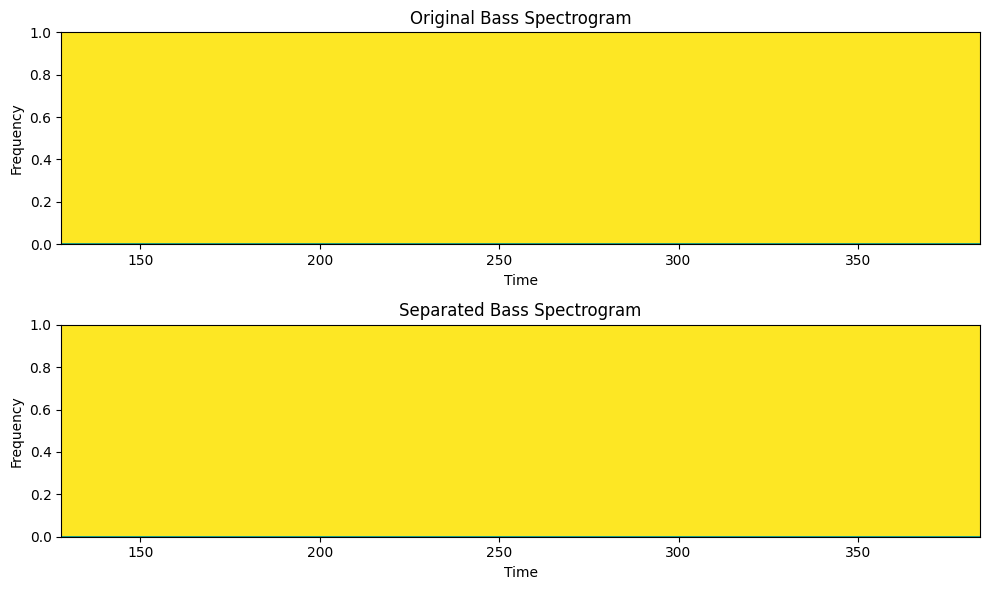

In [129]:
import torchaudio
import numpy as np
from mir_eval.separation import bss_eval_sources
import matplotlib.pyplot as plt

# Load the original and separated bass audio files
original_bass, _ = torchaudio.load('/content/gdrive/MyDrive/AudioFolder/open_unmix_source_bass.wav')
separated_bass, _ = torchaudio.load('/content/gdrive/MyDrive/AudioFolderFinal/merged_bass.wav')

# Ensure that the separated bass audio has the same length as the original
separated_bass = separated_bass[:, :original_bass.shape[1]]

# Convert torch tensors to numpy arrays
original_bass_np = original_bass.numpy()
separated_bass_np = separated_bass.numpy()

# Calculate SDR
sdr, _, _, _ = bss_eval_sources(original_bass_np, separated_bass_np)
print(f'SDR for bass: {sdr}')

# Generate and display spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.specgram(original_bass_np, Fs=original_bass.shape[0], NFFT=1024, noverlap=512)
plt.title('Original Bass Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.specgram(separated_bass_np, Fs=separated_bass.shape[0], NFFT=1024, noverlap=512)
plt.title('Separated Bass Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
